## 시각화 라이브러리, Seaborn

- Seaborn을 이용해서 데이터를 요약해서 보여주는 시각화를 진행해봅시다.

### Seaborn 라이브러리

`seaborn`은 파이썬의 데이터 시각화 라이브러리입니다. 이를 기반으로 수려한 그래프를 그릴 수 있습니다.

우선, 이를 사용하기 위해서 `pip`를 사용해 다운로드를 받아봅시다.

> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드를 실행할 수 있습니다.

In [2]:
# seaborn 라이브러리를 설치해봅시다.

%pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


설치를 다 진행했다면, 이제 `seaborn` 모듈을 사용할 준비가 되었습니다.

### Seaborn Essentials

`seaborn` 은 다양한 그래프를 그릴 수 있습니다.  
이 링크를 통해 어떤 그래프를 그릴 수 있는지 확인할 수 있습니다.

저희는 이중에서 자주 사용되는 꺾은선 그래프와 막대 그래프를 그려보면서 사용 방법을 익혀보도록 하겠습니다.

In [3]:
# 시각화에 필요한 라이브러리를 불러와봅시다.

import seaborn as sns

### 꺾은선 그래프(Line Plot)

두 변수의 값에 따른 추이를 선으로 이은 그래프입니다. 
`.lineplot()`를 이용해서 이를 그릴 수 있습니다.

<AxesSubplot:>

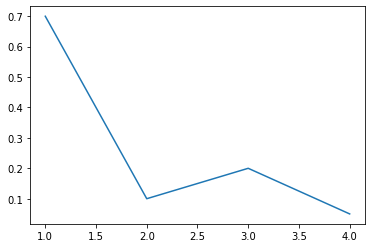

In [5]:
# Scatterplot을 직접 그려봅시다
# 값 x=[1, 3, 2, 4]
# 값 y=[0.7,0.2,0.1,0.05]

sns.lineplot(x=[1, 3, 2, 4], y=[0.7,0.2,0.1,0.05])

### 막대 그래프(Bar Plot)

범주형 데이터의 "값"과 그 값의 크기를 직사각형으로 나타낸 그림입니다.  
`.barplot()`를 이용해서 이를 그릴 수 있습니다.  

지난 실습에서 다룬 마우스 실습을 통해 로그인 창에 접속하는 것에 성공했는데요,  
여기에 이제 키보드 입력을 넣어서 로그인을 완료해봅시다.

<AxesSubplot:>

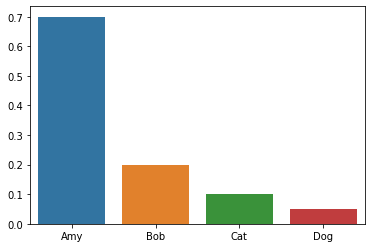

In [8]:
# Barplot을 직접 그려봅시다
# 범주 x=[1,2,3,4]
# 값 y=[0.7,0.2,0.1,0.05]

sns.barplot(x=["Amy","Bob","Cat","Dog"], y=[0.7,0.2,0.1,0.05])

### Plot의 속성

`seaborn`은 파이썬의 시각화 라이브러리 `matplotlib`을 기반으로 만들어졌습니다.  
`matplotlib.pyplot`의 속성을 변경해서 그래프에 다양한 요소를 변경/추가할 수 있습니다.

In [11]:
# matplotlib.pyplot을 불러와봅시다.

import matplotlib.pyplot as plt

`plt.title()` : 그래프에 **제목** 을 추가합니다

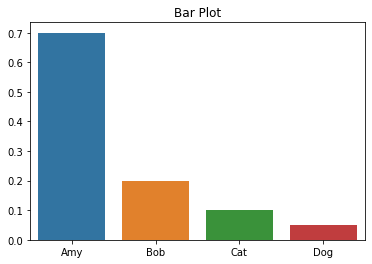

In [12]:
#TODO: 제목을 추가해봅시다.

sns.barplot(x=["Amy","Bob","Cat","Dog"],y=[0.7,0.2,0.1,0.05])
plt.title("Bar Plot")

plt.show()

`plt._label()` : 그래프의 축에 **설명** 을 추가합니다

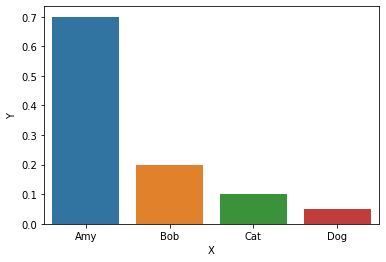

In [13]:
#TODO: xlabel과 ylabel을 추가해봅시다.

sns.barplot(x=["Amy","Bob","Cat","Dog"],y=[0.7,0.2,0.1,0.05])
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

`plt._lim()` : 그래프의 축의 **범위** 를 지정합니다.

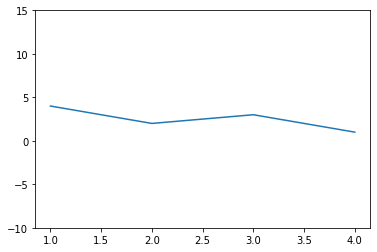

In [16]:
#TODO: lineplot에서 ylim을 2~3으로 제한해봅시다.

sns.lineplot(x=[1, 3, 2, 4], y=[4, 3, 2, 1])
plt.ylim(-10,15)

plt.show()

`plt.figure(figsize = (x, y))` : 그래프의 **크기** 를 지정합니다.

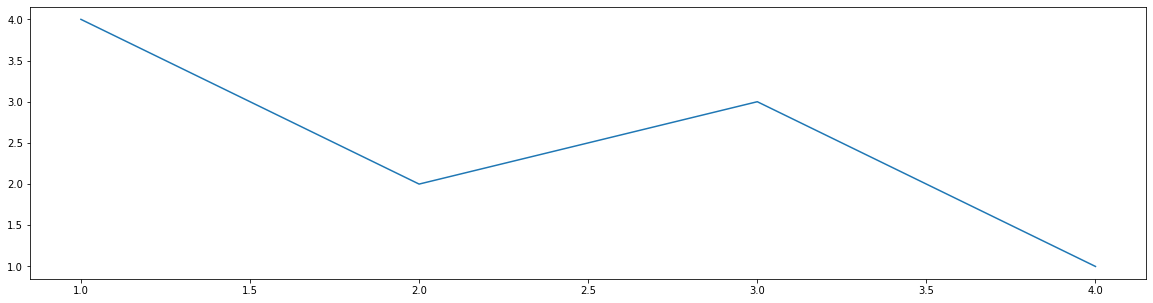

In [20]:
#TODO: 크기를 (20, 10)으로 지정해봅시다.

plt.figure(figsize=(20, 5))
sns.lineplot(x=[1, 3, 2, 4], y=[4, 3, 2, 1])

plt.show()

간단한 사용법을 확인했으니, 이제 이를 활용해서 스크래핑과 함께 사용해봅시다!

Tip: 이 외에도 다양한 그래프를 그릴 수 있습니다.  
[이 링크](https://seaborn.pydata.org/examples/index.html)를 통해 더 자세히 살펴보실 수 있습니다. :)

----
## 스크래핑 결과 시각화하기 I - 기상청 날씨 정보 조회

- Selenium과 Seaborn을 이용해서 날씨 정보를 가져온 후 Lineplot을 그려봅시다.

### Target: 기상청 날씨 스크래핑하기

다음 사이트에 Selenium을 이용해서 날씨 정보를 가져와봅시다. : https://www.weather.go.kr/w/weather/forecast/short-term.do

In [22]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [31]:
# driver를 이용해 해당 사이트에 요청을 보내봅시다.

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")

temps = driver.find_element(By.ID, "my-tchart").text

# 문자열 형태로 값이 불러와지기 때문에 그래프를 그릴 수 없다. 따라서 int형으로 바꿔주는 리스트 컴프렌션 작업이 필요
temps = [int(i) for i in temps.replace("℃","").split("\n")]

print(temps)

[26, 28, 27, 28, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 27]


**꺾은선 그래프(Line Plot)** 을 이용해 앞으로의 기온의 추이를 나타내봅시다.


<AxesSubplot:>

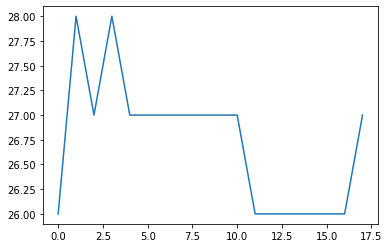

In [35]:
# 받아온 데이터를 통해 꺾은선 그래프를 그려봅시다.
# x = Elapsed Time(0~len(temperatures)
# y = temperatures

sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)

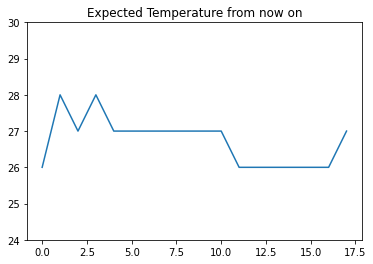

In [33]:
# 받아온 데이터의 ylim을 조금 더 길게 잡아봅시다.

plt.ylim(min(temps)-2, max(temps)+2)
plt.title("Expected Temperature from now on")

sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)

plt.show()

----
## 스크래핑 결과 시각화하기 II - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [36]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [45]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.
# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.

import requests
from bs4 import BeautifulSoup

frequency = {}

for i in range(1, 11):
    # 페이지를 넘겨가면서 불러올거임
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    # 1. ul 태그를 모두 찾기
    # 2. 1번 안에 있는 li 태그의 text를 추출

    ul_tags = soup.find_all("ul", "question-tags")

    for ul in ul_tags:
        li_tags = ul.find_all("li")

        for li in li_tags:
            
            # 태그된 수를 세어서 질문 빈도 체크하기
            tag = li.text.strip()

            if tag not in frequency:
                frequency[tag] = 1
            else:
                frequency[tag] += 1

    print(frequency)

{'node.js': 2, 'python': 23, 'process': 1, 'web': 1, 'auto': 1, 'macro': 1, 'mariadb': 1, 'css': 2, 'html': 4, 'java': 5, 'crawling': 1, 'selenium': 2, 'algorithm': 1, 'list': 2, 'class': 1, 'private': 1, 'openpyxl': 2, 'c#': 1, 'web-crawling': 1, 'javascript': 1, 'python3': 1, 'selenium-webdrive': 1, 'random': 1, 'tuple': 1, 'pyinstaller': 1, 'mysql': 1, 'dataframe': 1, 'pandas': 1, 'function': 1, 'canvas': 1, 'fabric': 1, 'iterator': 1, 'c': 1, 'c++': 2, 'array': 1, 'advertisement': 1, 'regression-analysis': 1, 'logistic-regression': 1, 'statsmodels': 1, 'oop': 1, 'program': 1, 'eclipse': 1, 'runtime-error': 1, 'dump': 1, 'flutter': 1, 'react': 2, 'webview': 1, 'error': 1, 'dev-c++': 1, 'dictionary': 1, 'qt': 1, 'qt-designer': 1, 'typescript': 1, 'environment-variables': 1}
{'node.js': 2, 'python': 49, 'process': 1, 'web': 1, 'auto': 1, 'macro': 1, 'mariadb': 1, 'css': 2, 'html': 4, 'java': 9, 'crawling': 3, 'selenium': 4, 'algorithm': 1, 'list': 4, 'class': 1, 'private': 1, 'openpyx

In [46]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.

from collections import Counter

counter = Counter(frequency)

counter.most_common(10)

[('python', 243),
 ('c', 41),
 ('java', 35),
 ('c++', 26),
 ('list', 14),
 ('pandas', 13),
 ('selenium', 12),
 ('javascript', 11),
 ('for', 10),
 ('android', 10)]

<AxesSubplot:>

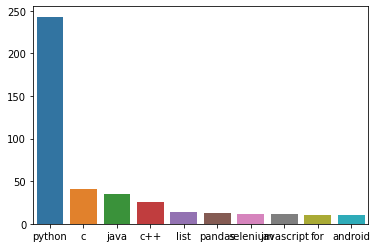

In [50]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.

x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]

sns.barplot(x=x, y=y)

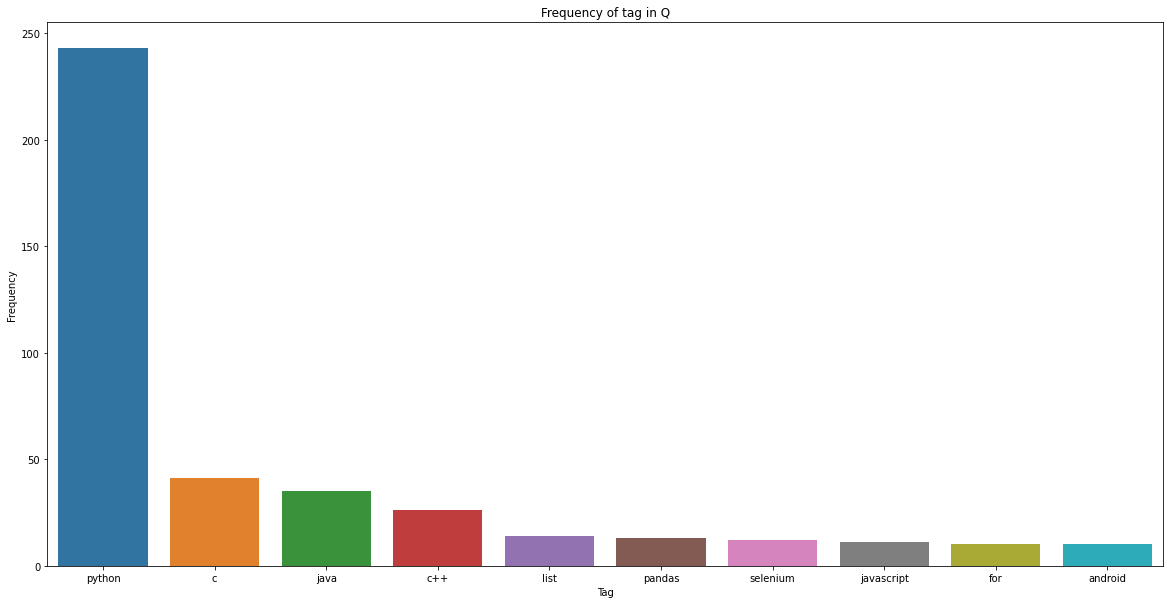

In [53]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

plt.figure(figsize=(20, 10))
plt.title("Frequency of tag in Q")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)

plt.show()

----
## 뭉게뭉게 단어구름, Wordcloud

- wordcloud를 이용해서 텍스트 구름을 만들어봅시다.

### `wordcloud` 라이브러리와 `konlpy` 라이브러리

`wordcloud`는 파이썬의 텍스트 클라우드 라이브러리입니다. 이를 기반으로 텍스트 구름을 그릴 수 있습니다.  
`konlpy`는 한국어 형태소 분석기 라이브러리로, 주어진 문장에서 명사 등을 뽑아 내는 데에 사용할 수 있습니다.

우선, 이들을 사용하기 위해서 `pip`를 사용해 다운로드를 받아봅시다.

> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드를 실행할 수 있습니다.

In [57]:
# wordcloudd와 konlpy를 설치해봅시다.

%pip install wordcloud
%pip install konlpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

설치를 다 진행했다면, 이제 `wordcloud` 라이브러리를 사용할 준비가 되었습니다.

### Wordcloud 만들기

WordCloud를 만드는 방법은 다음과 같습니다.

1. KoNLPy 라이브러리로 한국어 문장을 전처리
2. Counter를 이용해 빈도수 측정
3. WordCloud를 이용해 시각화

이 흐름대로 시각화를 진행해보도록 하겠습니다.

In [1]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [3]:
# 워드클라우드를 만드는 데 사용할 애국가 가사입니다.

national_anthem = """
동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
남산 위에 저 소나무 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
"""

형태소 분석기 객체를 사용해서 주어진 문자열에서 명사를 추출해봅시다.

In [8]:
# hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

hannanum = Hannanum()
nouns = hannanum.nouns(national_anthem)

nouns[:10]

OSError: [Errno 0] JVM DLL not found: /Library/Java/JavaVirtualMachines/jdk-18.jdk/Contents/Home/lib/libjli.dylib


**Java가 설치되어있지 않은 경우, 실행 중 오류가 발생할 수 있습니다.**  
[이 링크](https://www.oracle.com/java/technologies/downloads/)에서 여러분의 환경에 맞는 Java를 설치하신 후, 이후 과정을 따라와주세요.

In [10]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter = Counter(nouns)

Counter

NameError: name 'nouns' is not defined

In [9]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud = WordCloud(
    font_path="서체 /.ttf"
    width=1000,
    height=1000,
    background_color="white",
)

wordcloud.generate_from_frequencies(counter)
plt.imshow(img)

NameError: name 'counter' is not defined

간단한 사용법을 확인했으니, 이제 이를 활용해서 스크래핑과 함께 사용해봅시다!


----
## 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [ ]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [14]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# 이전에 진행했던 실습의 코드를 붙여넣으시면 됩니다.

# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.
# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.

import requests
from bs4 import BeautifulSoup

questions = []

import time

for i in range(1, 6):
    # 페이지를 넘겨가면서 불러올거임
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), {"User-Agent":user_agent})
    soup = BeautifulSoup(res.text, "html.parser")

    parsed_datas = soup.find_all("li", "question-list-item")

    for data in parsed_datas:
        questions.append(data.h4.text.strip())
    
    time.sleep(0.5)

In [15]:
questions[:10]

['코드를 비동기로 실행하고 싶어요',
 '여러 파이썬 프로세스가 경합하지 않고 결과를 올리면 모아두는 간단한 방법',
 '파이썬으로 할 자동화 프로젝트 질문드립니다',
 '비트나미 설치중 mariadb가 실행되지 않습니다.',
 'css 그리드에서 겉이 아닌 속에 선을 넣고 싶습니다.',
 '간단한 자바 반복문을 배우는 중인데,  증감연산자에 대해 잘 모르겠습니다',
 'Java list를 map으로 변환 하려고 합니다',
 'Python telnet 통신 초기화 질문',
 '파이썬 크롤링 관련하여 질문드립니다.',
 '자바 list의 sublist 사용해서 배열을 거꾸로 배치하는 코딩']

In [16]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [17]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

words = []

hannanum = Hannanum()

for question in questions:
    nouns = hannanum.nouns(question) # 1번 반복할 때 나온 명사들
    words += nouns # 누적해서 나오는 명사들

print(len(words))

OSError: [Errno 0] JVM DLL not found: /Library/Java/JavaVirtualMachines/jdk-18.jdk/Contents/Home/lib/libjli.dylib


In [ ]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter =Counter(words)

counter

In [ ]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud = WordCloud(
    font_path="...",
    background_color="whight"
    height=10-00,
    width=1000,
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)
